In [14]:
"""
Experiement #50
Time vs Mean Fluorescence of MitoTracker, Fluo-4, MitoSox and CellRox Green in W2 Trophozoites
"""

# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Apply theme
sns.set_theme(style="whitegrid")

# Import csv file
input_file = "./20221206 #50 LTF study-Batch_Analysis_06122022195649.csv"
df = pd.read_csv(input_file)

# Remove redundant columns
df = df.drop(columns=["Experiment Name", "Specimen Name", "$OP", "GUID", "Record Date"])

# Print dataframe
df

,Well Name,All Events %Parent,All Events %Total,All Events FITC-A Mean,All Events PE-A Mean,All Events APC-A Mean,All Events Pacific Blue-A Mean,P1 %Parent,P1 %Total,P1 FITC-A Mean,...,P1 Pacific Blue-A Mean,P2 %Parent,P2 %Total,P2 FITC-A Mean,P2 PE-A Mean,P2 APC-A Mean,P2 Pacific Blue-A Mean,dye,time,group
0,A1,NaN,100,89.76,25.79,92.48,39.12,68.59,68.59,85.84,...,37.79,0.06,0.04,1225.56,213.66,528.45,658.43,NaN,NaN,NaN
1,A2,NaN,100,103.34,30.72,121.28,599.90,85.16,85.16,90.21,...,409.48,7.58,6.46,244.00,67.47,269.52,3810.73,NaN,NaN,NaN
2,A3,NaN,100,89.91,26.53,1081.91,41.23,70.32,70.32,86.82,...,39.35,0.08,0.06,938.40,132.65,2848.06,880.73,NaN,NaN,NaN
3,B1,NaN,100,95.70,29.76,387.34,589.89,70.06,70.06,90.73,...,587.23,8.46,5.93,235.22,65.30,3273.37,5674.38,MitoTracker,80.0,TQ 10uM
4,B2,NaN,100,93.53,27.57,367.09,632.14,69.61,69.61,89.67,...,680.98,9.15,6.37,219.18,58.39,2940.53,6214.40,MitoTracker,80.0,TQ 10uM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,G11,NaN,100,154.73,31.06,93.55,351.01,75.42,75.42,163.24,...,401.37,8.87,6.69,969.99,62.19,139.03,3769.71,CellRox Green,20.0,TQ&MB lo
344,G12,NaN,100,176.60,30.91,89.67,368.39,76.25,76.25,190.02,...,417.29,9.47,7.22,1191.17,64.13,141.15,3666.99,CellRox Green,20.0,TQ&MB lo
345,H10,NaN,100,161.83,29.15,93.52,341.18,75.21,75.21,172.51,...,375.86,9.24,6.95,1054.97,61.39,134.17,3412.17,CellRox Green,20.0,Control
346,H11,NaN,100,163.36,28.81,96.09,337.94,75.25,75.25,176.18,...,381.13,9.16,6.89,1090.80,62.33,137.55,3482.66,CellRox Green,20.0,Control


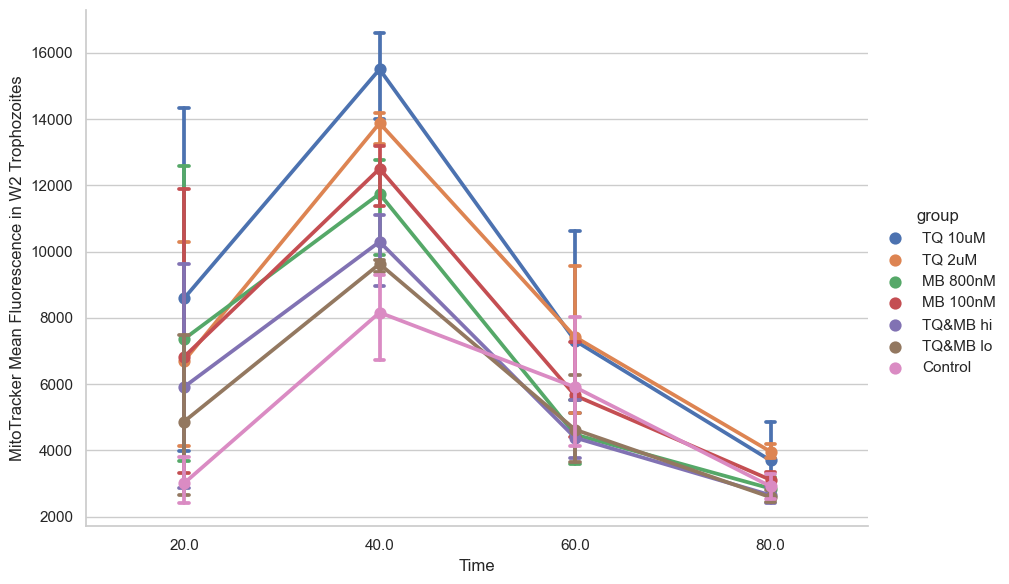

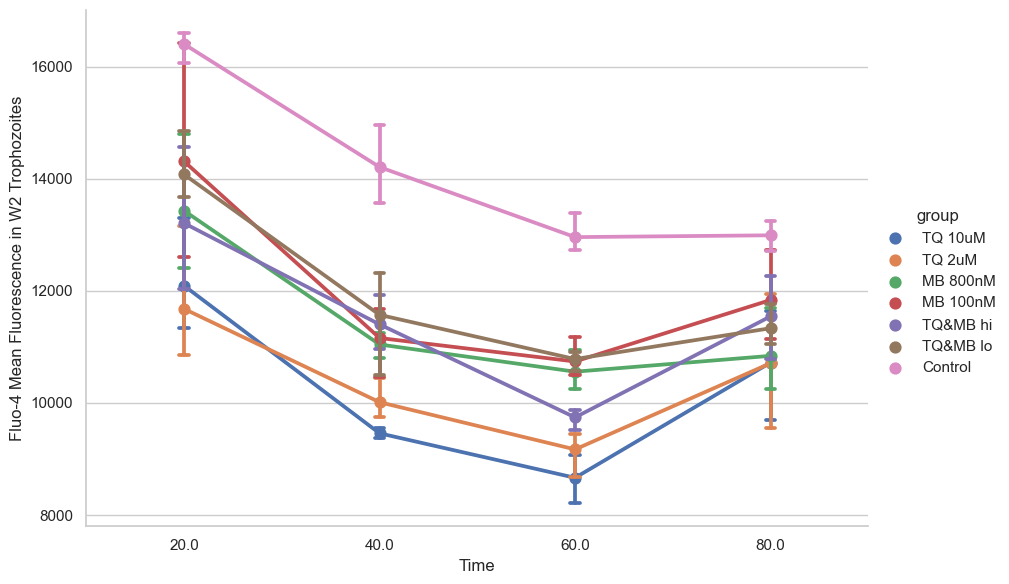

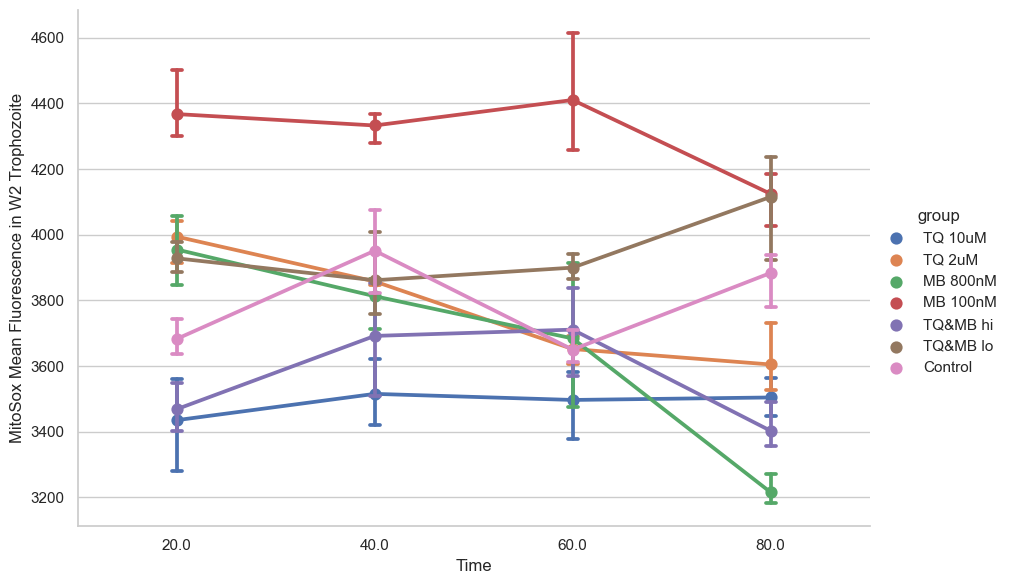

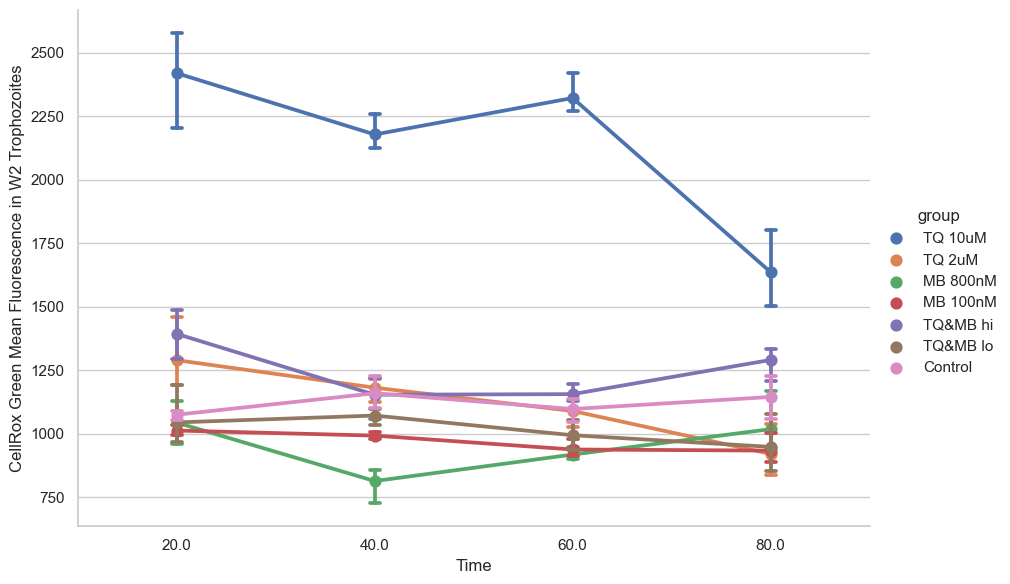

In [15]:
dye_pop_strain_stage = [
    ("MitoTracker","P2 APC-A Mean", "W2", "Trophozoites"),
    ("Fluo-4","P2 FITC-A Mean","W2", "Trophozoites"),
    ("MitoSox","P2 PE-A Mean","W2","Trophozoite"),
    ("CellRox Green","P2 FITC-A Mean","W2", "Trophozoites")
]

def time_vs_Mean_Fluorescence(dye,pop,strain,stage):
    
    df1 = df.loc[(df.dye == dye)]

    # Set parameters
    x="time"
    y=pop
    ylabel=f"{dye} Mean Fluorescence in {strain} {stage}"
    xlabel="Time"
    height=6
    aspect=1.5
    errorbar="sd"
    hue="group"
    kind="point"
    capsize=0.05

    # Assign graph
    ax = sns.catplot(data=df1, x=x, y=y, hue=hue,kind=kind,height=height,aspect=aspect, errorbar=errorbar,capsize=capsize)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    # Save png file and show plot
    savefig = ylabel.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

for dye,pop,strain,stage in dye_pop_strain_stage:
    time_vs_Mean_Fluorescence(dye,pop,strain,stage)